In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [5]:
train_df = pd.read_csv('train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [129]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [130]:
test_df.count()

Id               1459
MSSubClass       1459
MSZoning         1455
LotFrontage      1232
LotArea          1459
Street           1459
Alley             107
LotShape         1459
LandContour      1459
Utilities        1457
LotConfig        1459
LandSlope        1459
Neighborhood     1459
Condition1       1459
Condition2       1459
BldgType         1459
HouseStyle       1459
OverallQual      1459
OverallCond      1459
YearBuilt        1459
YearRemodAdd     1459
RoofStyle        1459
RoofMatl         1459
Exterior1st      1458
Exterior2nd      1458
MasVnrType       1443
MasVnrArea       1444
ExterQual        1459
ExterCond        1459
Foundation       1459
                 ... 
HalfBath         1459
BedroomAbvGr     1459
KitchenAbvGr     1459
KitchenQual      1458
TotRmsAbvGrd     1459
Functional       1457
Fireplaces       1459
FireplaceQu       729
GarageType       1383
GarageYrBlt      1381
GarageFinish     1381
GarageCars       1458
GarageArea       1458
GarageQual       1381
GarageCond

In [12]:
len(train_df.columns)

81

In [8]:
#Missing Data
total = train_df.isnull().sum().sort_values(ascending= False)
total

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [26]:
#去掉missing data 比例比较大的列
#去掉 miss data 大于80行的列
#train_df = train_df.drop(train_df[train_df.isnull().sum()>80].index,1)
drop_list = train_df.columns[train_df.isnull().sum()>80]
drop_list
train_df = train_df.drop(train_df[drop_list], axis =1)

In [28]:
len(train_df.columns)

70

In [29]:
#同样去掉test_df的missing data
test_df = test_df.drop(test_df[drop_list], axis =1)
test_df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [30]:
train_df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


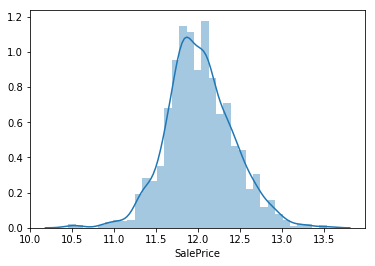

In [32]:
sns.distplot(np.log(train_df['SalePrice']))

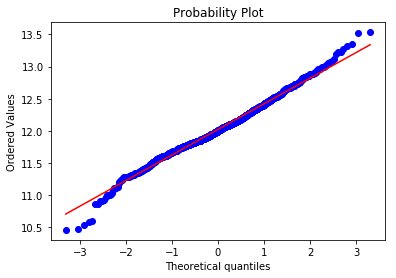

In [34]:
# 售价加上log变化，基本符合高斯分布
res = stats.probplot(np.log(train_df['SalePrice']),plot=plt)

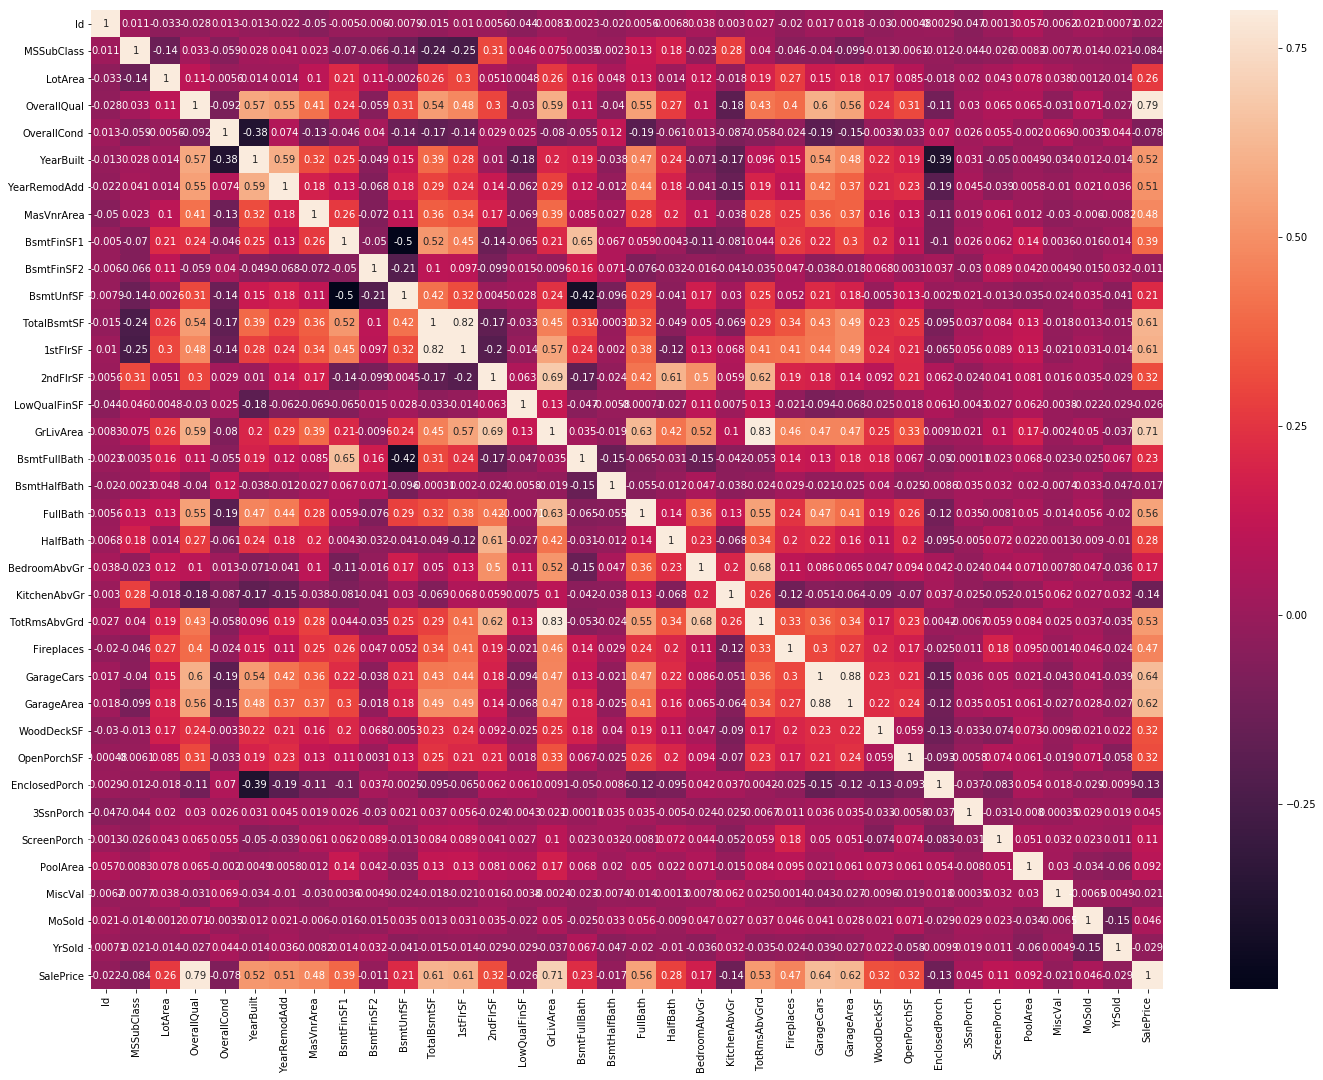

In [39]:
# 计算和saleprice 关联比较紧密的特征
corrmat = train_df.corr()
plt.subplots(figsize=(24,18))
sns.heatmap(corrmat, annot= True, vmax=0.8)

In [57]:
importance_feature = corrmat['SalePrice'][corrmat['SalePrice']>0].sort_values(ascending=False).index
train_df = train_df[importance_feature]
train_df.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch,PoolArea,MoSold,3SsnPorch
0,208500,7,1710,2,548,856,856,2,8,2003,...,61,1,8450,1,150,3,0,0,2,0
1,181500,6,1262,2,460,1262,1262,2,6,1976,...,0,0,9600,0,284,3,0,0,5,0
2,223500,7,1786,2,608,920,920,2,6,2001,...,42,1,11250,1,434,3,0,0,9,0
3,140000,7,1717,3,642,756,961,1,7,1915,...,35,0,9550,1,540,3,0,0,2,0
4,250000,8,2198,3,836,1145,1145,2,9,2000,...,84,1,14260,1,490,4,0,0,12,0


In [58]:
importance_feature= importance_feature.drop('SalePrice')

In [61]:
test_df = test_df[importance_feature]
test_df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch,PoolArea,MoSold,3SsnPorch
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,...,0,0,11622,0.0,270.0,2,120,0,6,0
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,...,36,1,14267,0.0,406.0,3,0,0,6,0
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,...,34,1,13830,0.0,137.0,3,0,0,3,0
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,...,36,1,9978,0.0,324.0,3,0,0,6,0
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,...,82,0,5005,0.0,1017.0,2,144,0,1,0


In [82]:
total = train_df.isnull().sum().sort_values(ascending= False)
total

3SsnPorch       0
MoSold          0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
Fireplaces      0
BsmtFinSF1      0
WoodDeckSF      0
2ndFlrSF        0
OpenPorchSF     0
HalfBath        0
LotArea         0
BsmtFullBath    0
BsmtUnfSF       0
BedroomAbvGr    0
ScreenPorch     0
PoolArea        0
SalePrice       0
dtype: int64

In [66]:
train_df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [81]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
#df["price"]=imp.fit_transform(df[["price"]]).ravel()
train_df['MasVnrArea'] = imp.fit_transform(train_df[['MasVnrArea']]).ravel()

In [105]:
total = test_df.isnull().sum().sort_values(ascending= False)
total

3SsnPorch       0
Fireplaces      0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
MoSold          0
WoodDeckSF      0
2ndFlrSF        0
OpenPorchSF     0
HalfBath        0
LotArea         0
BsmtFullBath    0
BsmtUnfSF       0
BedroomAbvGr    0
ScreenPorch     0
PoolArea        0
OverallQual     0
dtype: int64

In [102]:
test_df[['MasVnrArea','BsmtFullBath', 'BsmtFinSF1' , 'GarageCars', 'GarageArea', 'BsmtUnfSF' , 'TotalBsmtSF']].describe()

,MasVnrArea,BsmtFullBath,BsmtFinSF1,GarageCars,GarageArea,BsmtUnfSF,TotalBsmtSF
count,1444.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,100.709141,0.434454,439.203704,1.766118,472.768861,554.294925,1046.117970
std,177.625900,0.530283,455.111888,0.775679,216.974165,437.110508,442.746712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,318.000000,219.500000,784.000000
50%,0.000000,0.000000,351.000000,2.000000,480.000000,460.000000,988.000000
75%,164.000000,1.000000,752.000000,2.000000,576.000000,797.500000,1304.000000
max,1290.000000,3.000000,4010.000000,5.000000,1488.000000,2140.000000,5095.000000


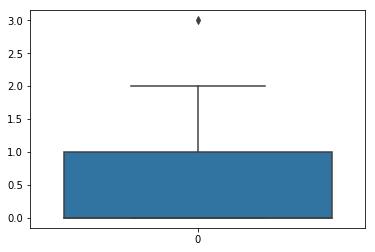

In [99]:
#sns.distplot(test_df['BsmtFullBath'].isnull())
test_1 = test_df['BsmtFullBath']
test_1.drop(test_df['BsmtFullBath'][test_df['BsmtFullBath'].isnull()].index)
sns.boxplot(data = test_1)

In [100]:
tran_list = ['BsmtFullBath', 'BsmtFinSF1' , 'GarageCars', 'GarageArea', 'BsmtUnfSF' , 'TotalBsmtSF']
test_df[tran_list] = imp.fit_transform(test_df[tran_list])

In [104]:
test_df['MasVnrArea'] = imp.fit_transform(test_df[['MasVnrArea']]).ravel()

In [118]:
# 开始训练
from sklearn import linear_model
train_y = train_df['SalePrice']
train_x = train_df.iloc[:, 1:]
test_x = test_df
train_x.columns


Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF', '2ndFlrSF',
       'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF',
       'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch'],
      dtype='object')

In [119]:
logistic = linear_model.LogisticRegression()
logistic.fit(train_x, train_y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [135]:
result_y = logistic.predict(test_x)
filename = 'sample_submission_' + 'l2'  +'.csv'
submission =pd.DataFrame({'Id': list(test_df['Id']),'SalePrice':result_y})
submission.to_csv(filename,index=False)

In [134]:
test_df['Id']

0       1461
1       1462
2       1463
3       1464
4       1465
5       1466
6       1467
7       1468
8       1469
9       1470
10      1471
11      1472
12      1473
13      1474
14      1475
15      1476
16      1477
17      1478
18      1479
19      1480
20      1481
21      1482
22      1483
23      1484
24      1485
25      1486
26      1487
27      1488
28      1489
29      1490
        ... 
1429    2890
1430    2891
1431    2892
1432    2893
1433    2894
1434    2895
1435    2896
1436    2897
1437    2898
1438    2899
1439    2900
1440    2901
1441    2902
1442    2903
1443    2904
1444    2905
1445    2906
1446    2907
1447    2908
1448    2909
1449    2910
1450    2911
1451    2912
1452    2913
1453    2914
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64